In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import math
import glob

In [2]:
def sMAPE(a, b):
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(100*2.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()

In [3]:
def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [6]:
def basic_avg(df):
    
    df['tstp'] = pd.to_datetime(df['tstp'],format = '%d/%m/%Y %H:%M')
    
    #Separate into train and test
    print('separating into train and test')
    train = df[:33600]
    test = df[33600:]
    y_test = test['energy(kWh/hh)'].to_list()
               
    # groupby (in our case this is the prediction)
    print('Predicting')
    prediction_hh = []
    mean = train["energy(kWh/hh)"].mean()
    prediction_hh.append(mean)
    #Since our test is 4 weeks long, our prediction has to be 4 weeks long
    y_pred = prediction_hh*1488   
        
    #Metrics
    print('Calculating metrics')
    mape_i = sMAPE(y_test,y_pred)
    rmsle_i = rmsle(y_test,y_pred)
    
    return mape_i, rmsle_i
    

In [84]:
# Load all the blocks and concatenate them into one database
path = '/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/code_datasets/1_data_frames/univariate/comfortable_tou' # use your path
all_files = glob.glob(path + "/*.csv")

i = 0
mape_t = []
rmsle_t = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    mape_i,rmsle_i = basic_avg(df)
    mape_t.append(mape_i)
    rmsle_t.append(rmsle_i)
    i = i + 1
    print('filename number ' + str(i))

separating into train and test
Predicting
Calculating metrics
filename number 1
separating into train and test
Predicting
Calculating metrics
filename number 2
separating into train and test
Predicting
Calculating metrics
filename number 3
separating into train and test
Predicting
Calculating metrics
filename number 4
separating into train and test
Predicting
Calculating metrics
filename number 5
separating into train and test
Predicting
Calculating metrics
filename number 6
separating into train and test
Predicting
Calculating metrics
filename number 7
separating into train and test
Predicting
Calculating metrics
filename number 8
separating into train and test
Predicting
Calculating metrics
filename number 9
separating into train and test
Predicting
Calculating metrics
filename number 10
separating into train and test
Predicting
Calculating metrics
filename number 11
separating into train and test
Predicting
Calculating metrics
filename number 12
separating into train and test
Predic

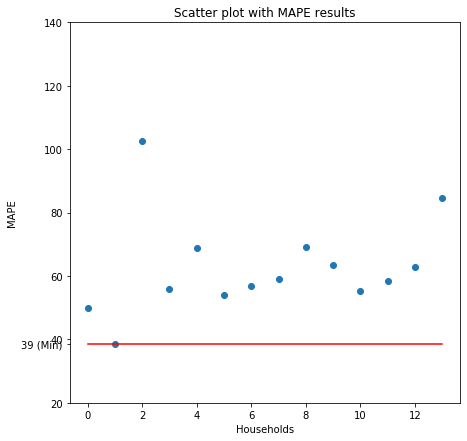

In [85]:
plt.figure(figsize = (7,7))
plt.scatter(range(len(mape_t)),mape_t)
plt.plot(range(len(mape_t)),[min(mape_t)]*len(mape_t),color = 'red')
plt.yticks([min(mape_t),20,40,60,80,100,120,140],[str(round(min(mape_t)))+' (Min)','20','40','60','80','100','120','140'])
plt.title('Scatter plot with MAPE results',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('MAPE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/1_average_model/MAPE_comfortable_tou')
plt.show()

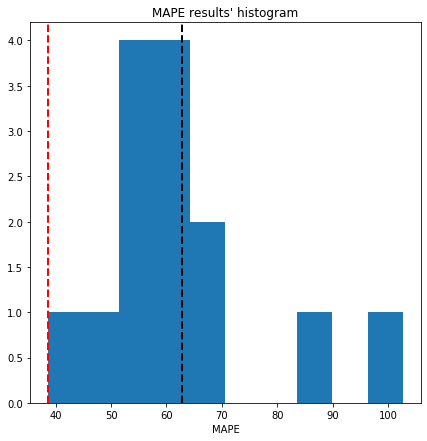

In [86]:
plt.figure(figsize = (7,7))
plt.hist(mape_t)
plt.axvline(x=min(mape_t), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=np.average(mape_t), color='black', linestyle='dashed', linewidth=2)
plt.title("MAPE results' histogram",fontsize = 12)
plt.xlabel('MAPE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/1_average_model/MAPE_1_comfortable_tou')
plt.show()

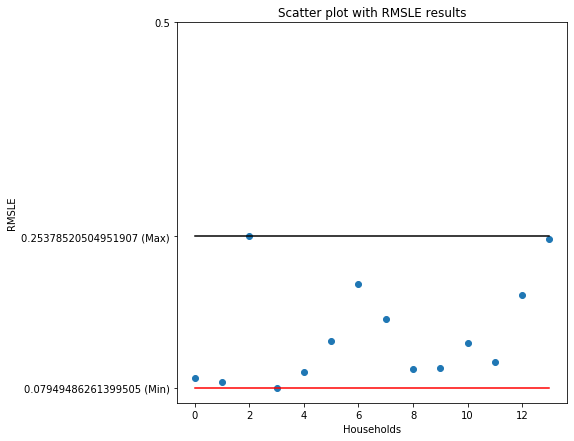

In [87]:
plt.figure(figsize = (7,7))
plt.scatter(range(len(rmsle_t)),rmsle_t)
plt.plot(range(len(rmsle_t)),[min(rmsle_t)]*len(rmsle_t),color = 'red')
plt.plot(range(len(rmsle_t)),[max(rmsle_t)]*len(rmsle_t),color = 'black')
plt.yticks([min(rmsle_t),max(rmsle_t),0.5],[str(min(rmsle_t))+' (Min)',str(max(rmsle_t))+' (Max)','0.5'])
plt.title('Scatter plot with RMSLE results',fontsize = 12)
plt.xlabel('Households')
plt.ylabel('RMSLE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/1_average_model/RMSLE_comfortable_tou')
plt.show()

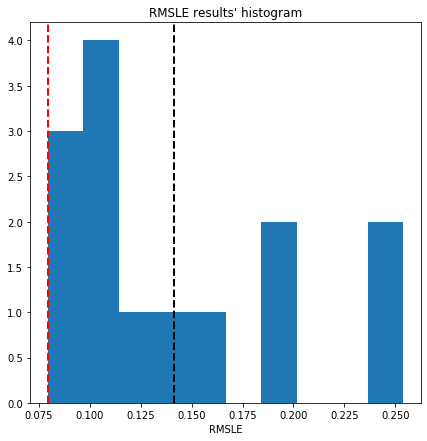

In [88]:
plt.figure(figsize = (7,7))
plt.hist(rmsle_t)
plt.axvline(x=min(rmsle_t), color='red', linestyle='dashed', linewidth=2)
plt.axvline(x=np.average(rmsle_t), color='black', linestyle='dashed', linewidth=2)
plt.title("RMSLE results' histogram",fontsize = 12)
plt.xlabel('RMSLE')
plt.savefig('/Users/mariabelenalberti/OneDrive - Universidad Torcuato Di Tella/Tesis/plots/1_average_model/RMSLE_1_comfortable_tou')
plt.show()